In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv('read_data.csv')

csv_address = df['csv_address']
arrival = df['arrival']

In [4]:
for line in csv_address:
    lunar_data = pd.read_csv(f'{line}')
    break

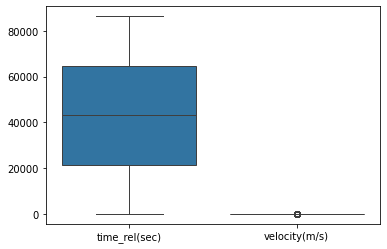

In [15]:
sns.boxplot(lunar_data)
plt.show()

In [16]:
random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(lunar_data[['velocity(m/s)']])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F4E71FFB640, 'verbose': 0, 'warm_start': False}


In [23]:
lunar_data['scores'] = model.decision_function(lunar_data[['velocity(m/s)']])

lunar_data['anomaly_score'] = model.predict(lunar_data[['velocity(m/s)']])

lunar_data[lunar_data['anomaly_score']==1].head()

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s),scores,anomaly_score
0,1970-01-19T00:00:00.665000,0.000000,-6.153279e-14,0.0,1
1,1970-01-19T00:00:00.815943,0.150943,-7.701288e-14,0.0,1
2,1970-01-19T00:00:00.966887,0.301887,-8.396187e-14,0.0,1
3,1970-01-19T00:00:01.117830,0.452830,-8.096155e-14,0.0,1
4,1970-01-19T00:00:01.268774,0.603774,-7.097599e-14,0.0,1
